<a href="https://colab.research.google.com/github/gabrieladamasceno/Attacks_5G/blob/main/Attacks_5G_Aprendizado_Federado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregamento e Preparação do Dataset




In [ ]:
from google.colab import drive
import pandas as pd

# Acessar dataset
drive.mount('/content/gdrive')

# Carregar o dataset
encoded = pd.read_csv("/content/gdrive/MyDrive/Datasets/Attacks/Encoded/Encoded.csv")

# Verificar as primeiras linhas do dataset
encoded.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,54,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(encoded.dtypes)
print(encoded.columns)

Unnamed: 0      int64
Seq             int64
Dur           float64
RunTime       float64
Mean          float64
               ...   
cs4           float64
cs6           float64
cs7           float64
ef            float64
nan           float64
Length: 96, dtype: object
Index(['Unnamed: 0', 'Seq', 'Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max',
       'sTos', 'dTos', 'sTtl', 'dTtl', 'sHops', 'dHops', 'TotPkts', 'SrcPkts',
       'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz',
       'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss',
       'DstLoss', 'pLoss', 'SrcGap', 'DstGap', 'Rate', 'SrcRate', 'DstRate',
       'SrcWin', 'DstWin', 'sVid', 'dVid', 'SrcTCPBase', 'DstTCPBase',
       'TcpRtt', 'SynAck', 'AckDat', 'Label', 'Attack Type', 'Attack Tool',
       ' *        ', ' *    V   ', ' *    f   ', ' e        ', ' e    f   ',
       ' e &      ', ' e *      ', ' e d      ', ' e g      ', ' e i      ',
       ' e r      ', ' e s      ', ' eU       ', 'e 

# Tratamento dos Dados

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Selecionar características e rótulos, incluindo 'Loss' agora
features = ['Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max', 'Loss']
data = encoded[features]
labels = encoded['Label']

# Converter para NumPy arrays
data = data.values
labels = labels.values

# Converter para tensores PyTorch
data = torch.tensor(data, dtype=torch.float32)

# Converter rótulos para números inteiros
labels, label_map = pd.factorize(encoded['Label'])
print("Mapa de rótulos:", label_map)

# Converter para tensores PyTorch
data = torch.tensor(data, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.long)

# Dividir o dataset em treinamento e teste
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Mapa de rótulos: Index(['Benign', 'Malicious'], dtype='object')


<ipython-input-47-f13de7d15da7>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.float32)


In [ ]:
# Converter para tensores PyTorch
data_train = torch.tensor(data_train, dtype=torch.float32)
labels_train = torch.tensor(labels_train, dtype=torch.long)
data_test = torch.tensor(data_test, dtype=torch.float32)
labels_test = torch.tensor(labels_test, dtype=torch.long)

# Criar datasets PyTorch
train_dataset = TensorDataset(data_train, labels_train)
test_dataset = TensorDataset(data_test, labels_test)

# Criar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

<ipython-input-48-734071833c23>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_train = torch.tensor(data_train, dtype=torch.float32)
<ipython-input-48-734071833c23>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_train = torch.tensor(labels_train, dtype=torch.long)
<ipython-input-48-734071833c23>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_test = torch.tensor(data_test, dtype=torch.float32)
<ipython-input-48-734071833c23>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone(

# Definir o Modelo para Classificação de Ataques

In [ ]:
# Definir o modelo com Dropout
class ImprovedAttackModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ImprovedAttackModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

# Inicializar o modelo global
input_size = data.shape[1]
hidden_size = 100
output_size = len(label_map)

global_model = ImprovedAttackModel(input_size, hidden_size, output_size)

# Configurar o critério de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(global_model.parameters(), lr=0.001)

In [ ]:
# Função de treinamento local
def train_local(model, loader, criterion, optimizer, epochs):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        epoch_losses = []
        for data, labels in loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_losses.append(loss.item())
        avg_loss = sum(epoch_losses) / len(epoch_losses)
        train_losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    return model.state_dict(), train_losses


# Treinamento Local em Cada Cliente

In [ ]:
# Simular o treinamento federado
def federated_learning(global_model, client_loaders, criterion, optimizer, epochs):
    client_models = []
    all_train_losses = []
    for client_loader in client_loaders:
        client_model = ImprovedAttackModel(input_size, hidden_size, output_size)
        client_model.load_state_dict(global_model.state_dict())
        client_optimizer = optim.Adam(client_model.parameters(), lr=0.001)
        client_model_params, train_losses = train_local(client_model, client_loader, criterion, client_optimizer, epochs)
        client_models.append(client_model.state_dict())
        all_train_losses.append(train_losses)
    global_model = aggregate_models(global_model, client_models)
    return global_model, all_train_losses

In [ ]:
# Testar o modelo global
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = correct / total
    return accuracy

# Agregação Federada

In [53]:
# Simular o treinamento federado
num_clients = 10  # Ajuste o número de clientes conforme necessário
clients_datasets = [TensorDataset(data_train, labels_train) for _ in range(num_clients)]
clients_loaders = [DataLoader(d, batch_size=64, shuffle=True) for d in clients_datasets]

epochs = 10  # Número de épocas para treinamento local
global_model, all_train_losses = federated_learning(global_model, clients_loaders, criterion, optimizer, epochs)

Epoch [1/10], Loss: 0.6423
Epoch [2/10], Loss: 0.6264
Epoch [3/10], Loss: 0.6155
Epoch [4/10], Loss: 0.6062
Epoch [5/10], Loss: 0.6024
Epoch [6/10], Loss: 0.6010
Epoch [7/10], Loss: 0.6016
Epoch [8/10], Loss: 0.6025
Epoch [9/10], Loss: 0.6019
Epoch [10/10], Loss: 0.6014
Epoch [1/10], Loss: 0.6429
Epoch [2/10], Loss: 0.6197
Epoch [3/10], Loss: 0.6124
Epoch [4/10], Loss: 0.6069
Epoch [5/10], Loss: 0.6054
Epoch [6/10], Loss: 0.6060
Epoch [7/10], Loss: 0.6048
Epoch [8/10], Loss: 0.6059
Epoch [9/10], Loss: 0.6033
Epoch [10/10], Loss: 0.6063
Epoch [1/10], Loss: 0.6384
Epoch [2/10], Loss: 0.6145
Epoch [3/10], Loss: 0.6094
Epoch [4/10], Loss: 0.6087
Epoch [5/10], Loss: 0.6070
Epoch [6/10], Loss: 0.6048
Epoch [7/10], Loss: 0.6048
Epoch [8/10], Loss: 0.6058
Epoch [9/10], Loss: 0.6034
Epoch [10/10], Loss: 0.6046
Epoch [1/10], Loss: 0.6379
Epoch [2/10], Loss: 0.6167
Epoch [3/10], Loss: 0.6121
Epoch [4/10], Loss: 0.6089
Epoch [5/10], Loss: 0.6053
Epoch [6/10], Loss: 0.6019
Epoch [7/10], Loss: 0.602

Accuracy of the global model: 54.89%


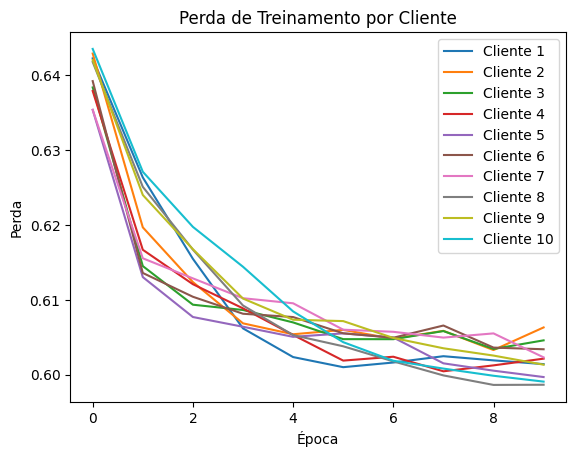

In [54]:
# Testar o modelo global
accuracy = test_model(global_model, test_loader)
print(f'Accuracy of the global model: {accuracy * 100:.2f}%')

# Plotar as perdas de treinamento
for client_idx, train_losses in enumerate(all_train_losses):
    plt.plot(train_losses, label=f'Cliente {client_idx + 1}')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda de Treinamento por Cliente')
plt.legend()
plt.show()